In [91]:
import random
def squareRootApproximate(n):
    x = n/2**len(str(n))
    a = n/2**len(str(n))
    iter = 0
    while True:
        if a*a > n:
            a -= (x/2)
            x = x / 2
        if a*a < n:
            a += x/2 
            x = x / 2
        if iter > 1000 and abs(a*a - n) < 1/10**15:
            return a,abs(a**2 - n)
        iter += 1
        if iter > 1000:
            return a,abs(a**2 - n)
        if abs(a*a - n) < 1/10**15:
            return a,abs(a**2 - n)


squareRootApproximate(4182931231237)        


(2045221.5604273784, 0.00048828125)

In [92]:
def sqrt_newton_raphson(N, initial_guess=1.0, tolerance=1/10**15, max_iterations=1000000000):
    x = initial_guess
    for _ in range(max_iterations):
        x_new = 0.5 * (x + N / x)
        if _ > 1000:
            return x_new,abs(x_new**2 - N)
        if abs(x_new**2 - N) < tolerance:
            return x_new,abs(x_new**2 - N)
        x = x_new
    raise ValueError("Square root calculation did not converge within the specified number of iterations.")

# Example usage:
N = 4182931231237
result = sqrt_newton_raphson(N)
print(f"The square root of {N} is approximately: {result}")


The square root of 4182931231237 is approximately: (2045221.5604273784, 0.00048828125)


In [91]:
import time
diff_1_values = []
diff_2_values = []
for i in range(2,10000):
    if i % 10000 == 0:
        print(i)
    a1,diff1 = sqrt_newton_raphson(i)
    a2,diff2 = squareRootApproximate(i)
    print(diff1,diff2)
    diff_1_values.append(diff1)
    diff_2_values.append(diff2)

4.440892098500626e-16 4.440892098500626e-16
4.440892098500626e-16 4.440892098500626e-16
0.0 0.0
8.881784197001252e-16 8.881784197001252e-16
8.881784197001252e-16 8.881784197001252e-16
8.881784197001252e-16 8.881784197001252e-16
1.7763568394002505e-15 1.7763568394002505e-15
0.0 0.0
1.7763568394002505e-15 1.7763568394002505e-15
0.0 0.0
1.7763568394002505e-15 1.7763568394002505e-15
1.7763568394002505e-15 1.7763568394002505e-15
0.0 0.0
1.7763568394002505e-15 1.7763568394002505e-15
0.0 0.0
0.0 0.0
3.552713678800501e-15 3.552713678800501e-15
3.552713678800501e-15 3.552713678800501e-15
3.552713678800501e-15 3.552713678800501e-15
0.0 0.0
0.0 0.0
3.552713678800501e-15 3.552713678800501e-15
3.552713678800501e-15 3.552713678800501e-15
0.0 0.0
3.552713678800501e-15 3.552713678800501e-15
0.0 0.0
3.552713678800501e-15 7.105427357601002e-15
7.105427357601002e-15 7.105427357601002e-15
0.0 0.0
7.105427357601002e-15 3.552713678800501e-15
7.105427357601002e-15 7.105427357601002e-15
0.0 0.0
0.0 0.0
0.0 0.

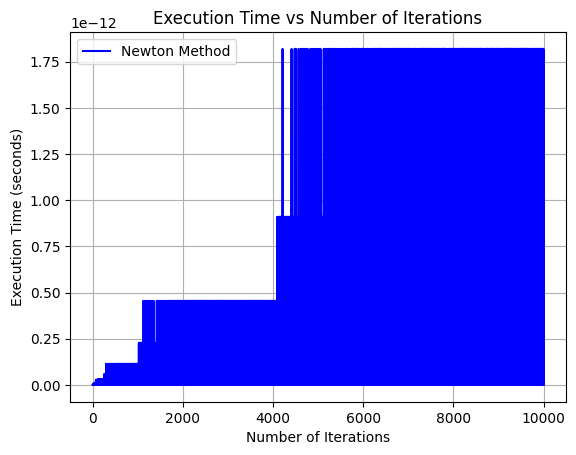

In [92]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(diff_1_values))], diff_1_values, linestyle='-', color='b',label="Newton Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

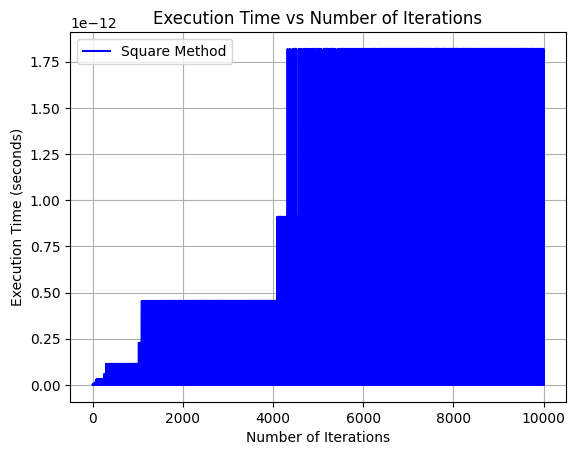

In [93]:
plt.plot([i for i in range(len(diff_2_values))], diff_2_values, linestyle='-', color='b',label="Square Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
import time
speed_square_method = []
speed_newton_method = []
for i in range(10**5,10**6):
    if i % 10000 == 0:
        print(i)
    start_time = time.time()
    sqrt_newton_raphson(i)
    end_time = time.time()
    speed_newton_method.append(end_time-start_time)
    start_time = time.time()
    squareRootApproximate(i)
    end_time = time.time()
    speed_square_method.append(end_time-start_time)
    

100000
110000
120000


KeyboardInterrupt: 

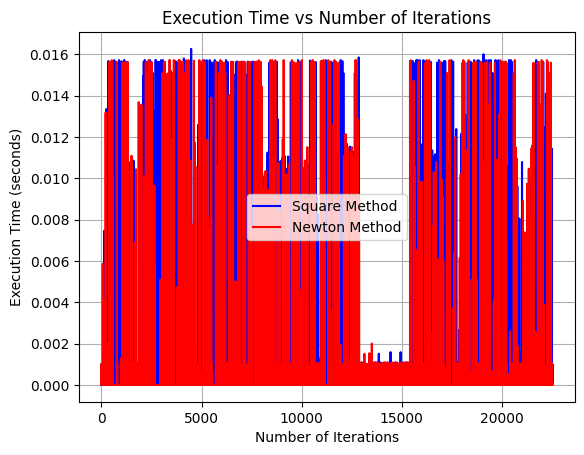

In [88]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(speed_square_method))], speed_square_method, linestyle='-', color='b',label="Square Method")
plt.plot([i for i in range(len(speed_newton_method))], speed_newton_method, linestyle='-', color='r',label="Newton Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

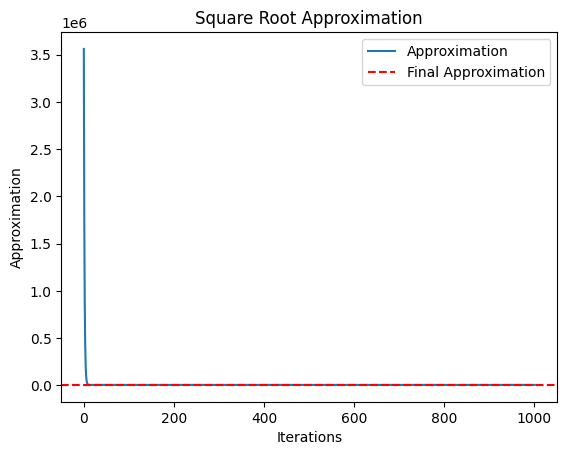

In [75]:
import matplotlib.pyplot as plt

def squareRootApproximate(n):
    m = 2
    x = n/m**2
    a = n/m**2
    iter = 0
    
    # Lists to store values for plotting
    iterations = []
    approximations = []
    
    while True:
        iterations.append(iter)
        approximations.append(a)
        
        if a*a > n:
            a -= (x/m)
            x = x / m
        if a*a < n:
            a += x/m
            x = x / m
        if iter > 1000:
            return a, abs(a**2 - n), iterations, approximations
        iter += 1
        if abs(a*a - n) < 1/10**15:
            return a, abs(a**2 - n), iterations, approximations

# Example usage
n = 14239123
result, error, iterations, approximations = squareRootApproximate(n)

# Plot the iterations vs. approximations
plt.plot(iterations, approximations, label='Approximation')
plt.axhline(y=result, color='r', linestyle='--', label='Final Approximation')
plt.xlabel('Iterations')
plt.ylabel('Approximation')
plt.title('Square Root Approximation')
plt.legend()
plt.show()


In [104]:
import random
def rootFunction(n,root):
    x = n/root
    a = n/root
    iter = 0
    while True:
        if a**root > n:
            a -= (x/2)
            x = x / 2
        if a**root < n:
            a += x/2 
            x = x / 2
        if iter > 1000 and abs(a**root - n) < 1/10**15:
            return a,abs(a**root - n)
        iter += 1
        if iter > 1000:
            return a,abs(a**root- n)
        if abs(a**root - n) < 1/10**15:
            return a,abs(a**root - n)


rootFunction(27,3)        


(3.0, 0.0)

In [96]:
def newton_method(number, root, tolerance=1e-10, max_iterations=1000):
    """
    Calculate the nth root of a given number using the Newton-Raphson method.

    :param number: The number for which to find the root.
    :param root: The root index (e.g., 2 for square root, 3 for cube root).
    :param tolerance: The desired tolerance for the approximation.
    :param max_iterations: The maximum number of iterations.
    :return: A tuple containing the root approximation and the absolute error.
    """

    if number < 0 and root % 2 == 0:
        raise ValueError("Cannot calculate even root of a negative number.")

    guess = number / 2  # Initial guess, can be adjusted based on the specific problem

    for iteration in range(max_iterations):
        current_guess = guess
        guess = ((root - 1) * guess + number / guess ** (root - 1)) / root

        # Check for convergence
        if abs(guess - current_guess) < tolerance:
            return guess, abs(guess ** root - number)

    raise ValueError("Newton-Raphson method did not converge within the specified number of iterations.")

# Example usage
number = 27
root = 3
result, error = newton_method(number, root)

print(f"Approximation of the {root}-th root of {number}: {result}")
print(f"Absolute error: {error}")


Approximation of the 3-th root of 27: 3.0
Absolute error: 0.0


In [106]:
import time
speed_square_method = []
speed_newton_method = []
for i in range(10**5,10**6):
    val = random.randint(2,30)
    if i % 10000 == 0:
        print(i)
    start_time = time.time()
    newton_method(i,val)
    end_time = time.time()
    speed_newton_method.append(end_time-start_time)
    start_time = time.time()
    rootFunction(i,val)
    end_time = time.time()
    speed_square_method.append(end_time-start_time)

100000
110000
120000


KeyboardInterrupt: 

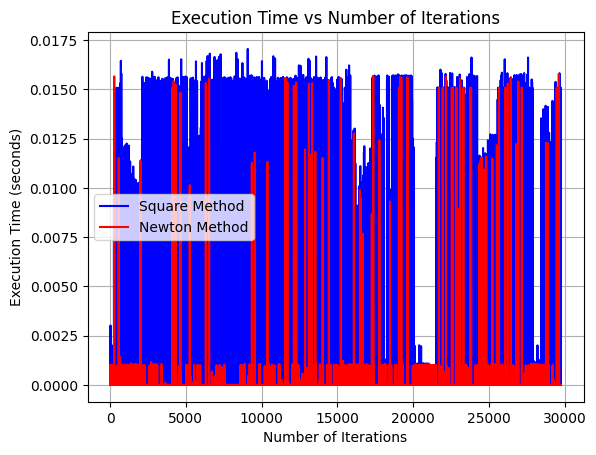

In [107]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(speed_square_method))], speed_square_method, linestyle='-', color='b',label="Square Method")
plt.plot([i for i in range(len(speed_newton_method))], speed_newton_method, linestyle='-', color='r',label="Newton Method")
plt.xlabel('Number of Iterations')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()